In [1]:
import System
import numpy as np
import time
%matplotlib notebook

0.4846502521368084


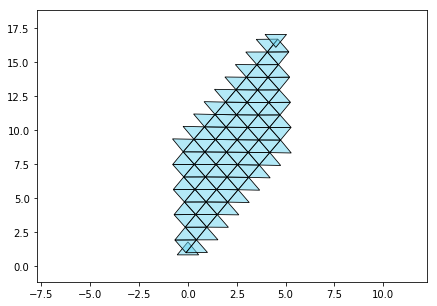

In [2]:
InitialState=np.array([[0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],                               
                        [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
                        [0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
                        [0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
                        [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0],
                        [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0],
                        [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0],
                        [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]])
system=System.System(InitialState,eps=0.1,Kmain=1.,Kcoupling=0.01,Kvol=1.)
print(system.Energy)
system.PlotPerSite()

In [3]:
system.Evolv(InitialState)

In [4]:
del(system)

In [2]:
def MakeParallel(size):
    State=[]
    for decal in range(size//2):
        ligne=np.zeros(size+size//2,dtype=int)
        k=0
        for i in range(size+size//2):
            if i>decal and k<size:
                ligne[i]=1
                k+=1
        State.append(ligne)
    return np.array(State)
def MakeHexagone(size):
    array=MakeParallel(size)
    pair=1
    if size%2==0:
        pair=0
    for j in range(array.shape[0]):
        for i in range(array.shape[1]):
            if i<=size/2+pair and j<size/2-i+pair:
                array[j,i]=0.
            if i>=size/2+pair and j>size-i+size/2-1-pair:
                array[j,i]=0
    return array

In [3]:
unique, counts = np.unique(MakeHexagone(40), return_counts=True)
dict(zip(unique, counts))

{0: 600, 1: 600}

In [4]:
unique, counts = np.unique(MakeParallel(20), return_counts=True)
dict(zip(unique, counts))

{0: 100, 1: 200}

2.3869936549999693


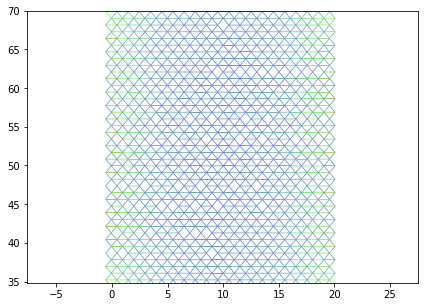

In [5]:
time_start = time.perf_counter()
system=System.System(MakeHexagone(80),eps=0.01,Kmain=1.,Kcoupling=0.01,Kvol=0.5)
print(time.perf_counter() - time_start)
system.PlotPerSpring()

create a new system
2.304737024000133


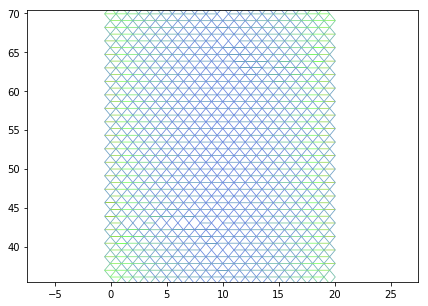

In [6]:
time_start = time.perf_counter()
NewSystem=System.System(old_system=system)
NewSystem.Evolv(MakeHexagone(81))
print(time.perf_counter() - time_start)
NewSystem.PlotPerSpring()

In [5]:
print(NewSystem.Energy)
print(system.Energy)

0.48983296703729984
0.48983296705832785


6.111180590000004


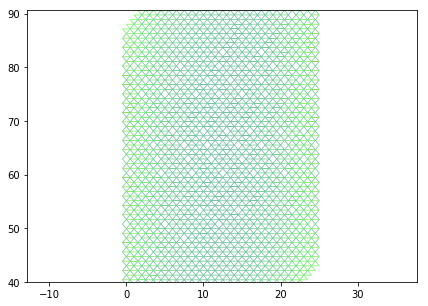

In [13]:
#del(system)
time_start = time.perf_counter()
system=System.System(MakeParallel(100),eps=0.001,Kmain=1.,Kcoupling=0.01,Kvol=1.)
print(time.perf_counter() - time_start)
system.PlotPerSpring()

0.2323838090001118


<IPython.core.display.Javascript object>


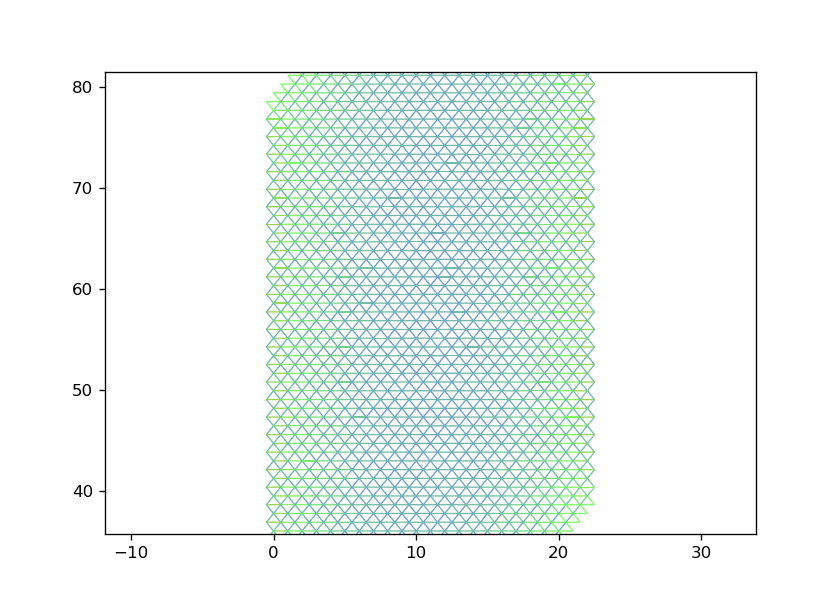

In [16]:
time_start = time.perf_counter()
system.Evolv(MakeParallel(90),)
print(time.perf_counter() - time_start)
system.PlotPerSpring()

create a new system
0.13548326599999427


<IPython.core.display.Javascript object>


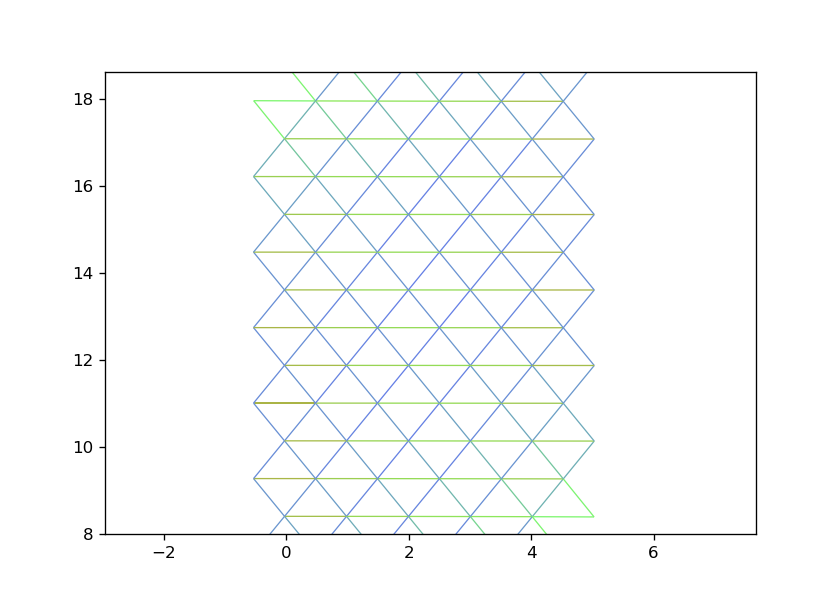

In [16]:
time_start = time.perf_counter()
system.Evolv(MakeParallel(20),)
print(time.perf_counter() - time_start)
system.PlotPerSpring()

0.013019668000197271


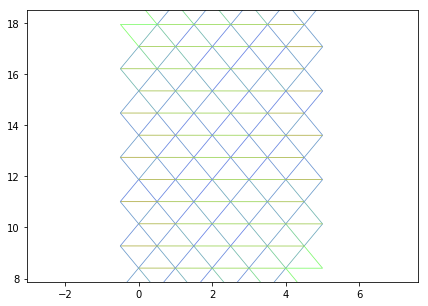

In [12]:
time_start = time.perf_counter()
system.UpdateState(MakeParallel(20))
print(time.perf_counter() - time_start)
system.PlotPerSpring()

In [ ]:
time_start = time.perf_counter()
system.Evolv(MakeHexagone(200))
print(time.perf_counter() - time_start)